<a href="https://colab.research.google.com/github/thalespieirini/Colab-linear-algebra/blob/master/bouncing_ball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Animação da bola quicando 

***meu primeiro laboratório no Colab...***

Equipe de ALA - UFRJ

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from matplotlib import animation
from IPython.display import HTML

In [0]:
# gerar pontos para formar uma reta
npoints = 1000 #número de pontos para desenhar
x = np.zeros(npoints) #coordenada x da bola
y = np.zeros(npoints) #coordenada y da bola
v = np.array([25.,7.]) #direção inicial
# p = np.array([0,0])   CRIA NUMPY ARRAY DE INTEIROS, PROBLEMA!!!
p = np.array([0.,0.]) #ponto inicial
alpha = 0 #passos
dirx=1 # Defino uma constante para mudar a direção de x
diry=1 # Defino uma constante para mudar a direção de y
for k in range(0,npoints):
  
  if y[k-1] > 10: 
    diry=diry*-1 #quando chegar no limite superior inverte a direção de y
    alpha=0 #Zera alpha para se deslocar a partir do novo ponto inicial
    p[1]=10 #quando chegar no limite superior define o y do ponto inicial como o limite superior
    p[0]=x[k-1] #quando chegar no limite superior define x do ponto inicial como a posição anterior de x
  if y[k-1] < -10: 
    diry=diry*-1 #quando chegar no limite inferior inverte a direção de y
    alpha=0 #Zera alpha para se deslocar a partir do novo ponto inicial
    p[1]=-10 #quando chegar no limite inferior define o y do ponto inicial como o limite inferior
    p[0]=x[k-1] #quando chegar no limite inferior define x do ponto inicial como a posição anterior de x
  if x[k-1] > 10: 
    dirx=dirx*-1 #quando chegar no limite lateral direito inverte a direção de x
    alpha=0 #Zera alpha para se deslocar a partir do novo ponto inicial
    p[0]=10 #quando chegar no limite lateral direito define o x do ponto inicial como o limite direito
    p[1]=y[k-1] #quando chegar no limite lateral direito define y do ponto inicial como a posição anterior de y
  if x[k-1] < -10:
    dirx=dirx*-1 #quando chegar no limite lateral esquerdo inverte a direção de x
    alpha=0 #Zera alpha para se deslocar a partir do novo ponto inicial
    p[0]=-10 #quando chegar no limite lateral esquerdo define o x do ponto inicial como o limite esquerdo
    p[1]=y[k-1] #quando chegar no limite lateral esquerdo define y do ponto inicial como a posição anterior de y
  
    
  
  y[k] = diry*alpha*v[1] + p[1] # nova formação do vetor levando em consideração a constante que inverte a direção de y
  x[k] = dirx*alpha*v[0] + p[0] # nova formação do vetor levando em consideração a constante que inverte a direção de x
  
  alpha = alpha + 0.1
  
    
    

(-10, 10)

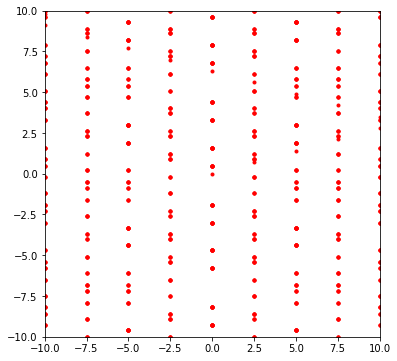

In [0]:
plt.figure(figsize=(6,6))
plt.plot(x,y,'r.')
plt.xlim(-10,10)
plt.ylim(-10,10)

Animação abaixo!!

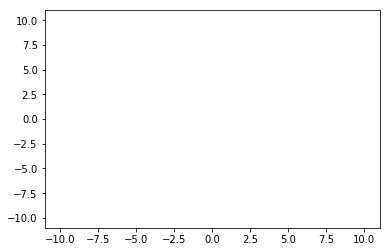

In [0]:
# primeiro, vamos apagar a antiga figure
plt.close()

# mesmas atribuicoes...
fig = plt.figure()
ax = plt.axes(xlim=(-11, 11), ylim=(-11, 11))
line, = ax.plot([], [], 'ro', lw=2)
npoints = 300
x = np.zeros(npoints)
y = np.zeros(npoints)
v = np.array([12.,4.])
p = np.array([0.,0.])
alpha = 0



In [0]:
# funcao init, inicia somente com background
def init():
    line.set_data([],[])
    return line,
dirx=1
diry=1
# funcao animate, chamada sequencialmente. Funciona da mesma forma que um for i in range(frames)
def animate(i):
    global x, y, alpha, v, p, dirx, diry
    
    if y[i-1] > 10:
      diry=diry*-1
      alpha=0
      p[1]=10
      p[0]=x[i-1]
    if y[i-1] < -10:
      diry=diry*-1
      alpha=0
      p[1]=-10
      p[0]=x[i-1]
    if x[i-1] > 10:
      dirx=dirx*-1
      alpha=0
      p[0]=10
      p[1]=y[i-1]
    if x[i-1] < -10:
      dirx=dirx*-1
      alpha=0
      p[0]=-10
      p[1]=y[i-1]

    
  
    y[i] = diry*alpha*v[1] + p[1]
    x[i] = dirx*alpha*v[0] + p[0]
    
    alpha = alpha + 0.1
    
    line.set_data(x[i], y[i])
    return line,
  
# chama o animator.  blit=True so redesenha as partes que de fato mudaram.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=npoints, interval=40, blit=True)




# Creditos e agradecimentos a Jake Vanderplas
# email: vanderplas@astro.washington.edu
# website: http://jakevdp.github.com

In [0]:
# funcao gera a animacao na pagina html corrente!
HTML(anim.to_jshtml())